In [1]:
# Week 3 Dimensionality Reduction
# PCA and t-SNE Exploration
print("Notebook initialized successfully")

Notebook initialized successfully


In [2]:
import numpy as np
import pandas as pd
import matplotlib

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
print("Imports loaded successfully")

Imports loaded successfully


In [4]:
iris = load_iris()
x = iris.data
y = iris.target
target_names = iris.target_names

print("X shape:", x.shape)
print("y shape:", y.shape)
print("Classes:", target_names)


X shape: (150, 4)
y shape: (150,)
Classes: ['setosa' 'versicolor' 'virginica']


In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
print("Scaled x mean (approx):", np.mean(x_scaled, axis=0))
print("Scaled x std (approx):", np.std(x_scaled, axis=0))

Scaled x mean (approx): [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
Scaled x std (approx): [1. 1. 1. 1.]


In [14]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)
print("Explained variance ratios:", pca.explained_variance_ratio_)
print("Total explained variance (2 components):", np.sum(pca.explained_variance_ratio_))

Explained variance ratios: [0.72962445 0.22850762]
Total explained variance (2 components): 0.9581320720000166


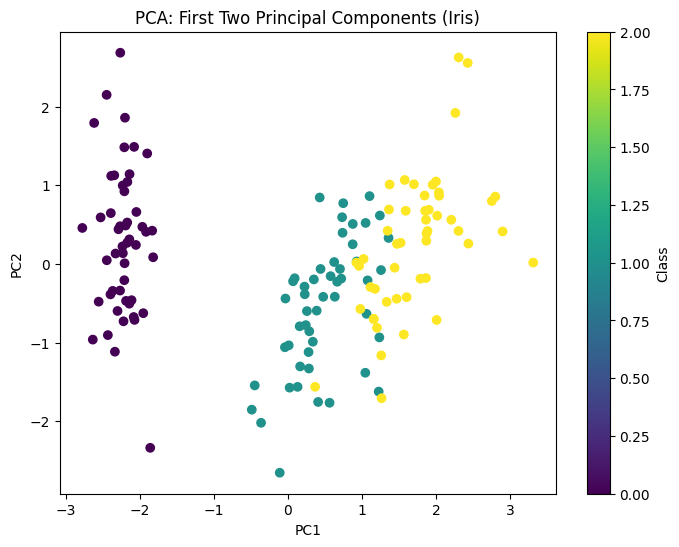

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
scatter = plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y)
plt.title("PCA: First Two Principal Components (Iris)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter, label="Class")
plt.show()


In [16]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
x_tsne = tsne.fit_transform(x_scaled)
print("t-SNE shape:", x_tsne.shape)

t-SNE shape: (150, 2)


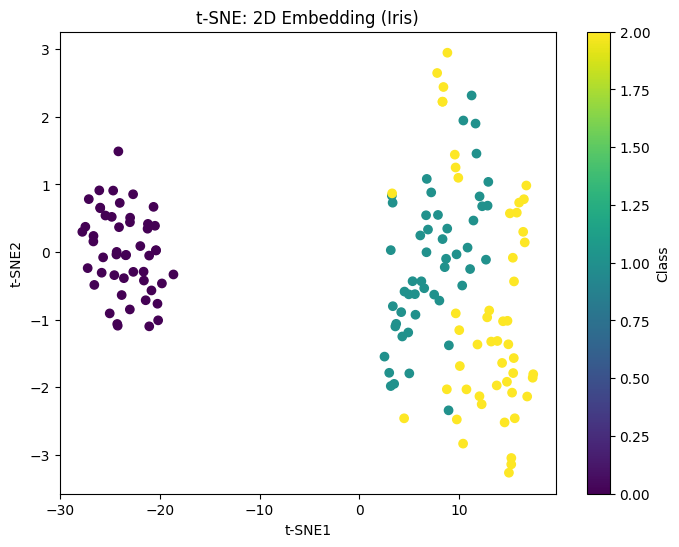

In [17]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=y)
plt.title("t-SNE: 2D Embedding (Iris)")
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.colorbar(scatter, label="Class")
plt.show()

### Comparison of PCA and t-SNE
The PCA visualization shows one class that is clearly seperated and two classes that partially overlap. This occurs because PCA is a linear method that perserves overall variance in the data rather than maximizing class seperation.
The t-SNE visualization shows tighter and more compact clusters. While the classes still exhibit some overlap, their boundaries appear more definded compared to PCA. This indicates that t-SNE is better at capturing non linear relationships and preserving local neighborhood structure. Overall, PCA is useful for understanding global structure and variance, while t-SNE is more effective for visualizing complex patterns and potential clustering.

### Explanation of Techniques
PCA reduced dimensionality by projecting data onto new axes that capture the maximum amount of variance. Each principal component is a linear combination of the original features.
t-SNE reduces dimensionality by modeling pairwise similarities between points and preserving local neighborhood relationships in a lower dimensional space. Both techniques transform high dimensional data into two dinensions for visualizaion, but they emphasize different aspects of the structure.

### Ethical Reflection
Dimensionality reduction can introduce bias by removing or compressing features that may be important for certain groups. If important attributes are lost, patterns affecting minority populations could be hidden or misrepresented. Visualization choices such as color scales, axis ranges, and dimensionality reduction methods can influence how results are interpreted. Certain patterns may appear stronger or weaker depending on these choices. Including diverse perspectives during feature selection and evaluation can help to identify the potential blindspots and improve overall fairness. This ensures that dimensionality reduction techniques are used responsibly and transparently.